# Baseline Model

Enable auto-reloading of external modules

In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import dependencies

In [24]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [25]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint

from source.config import *
from source.utils.model_tuning_utils import test_baseline_models

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [26]:
dataset_name = 'folktables'
state = 'LA'
extended_dataset_name = f"{dataset_name}_{state}"
dataset_config = DATASETS_CONFIG[dataset_name]
TARGET_COLUMN = dataset_config['target_column']

## Loading ACSEmployment data

In [27]:
# Creating a data frame
df = pd.read_csv(f"../../datasets/folktables-{state}-2018.csv", delimiter=',')
df.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,ESR
0,29,18,5,16,2,0,1,1,4,2,1,2,2,2,1,1,0
1,17,13,5,16,2,0,1,1,4,1,1,2,2,2,1,2,0
2,37,13,5,16,2,0,1,1,4,1,1,2,2,2,1,1,0
3,86,12,2,16,1,0,1,1,4,1,1,2,1,2,2,2,0
4,22,19,5,17,2,0,1,1,4,1,1,2,2,2,2,1,0


In [28]:
df.shape

(43588, 17)

In [29]:
df[TARGET_COLUMN].value_counts()

0    25363
1    18225
Name: ESR, dtype: int64

In [30]:
df['RAC1P'].value_counts()

1    29442
2    11583
9     1002
6      765
8      512
3      224
5       48
7       12
Name: RAC1P, dtype: int64

In [31]:
numerical_features = dataset_config['numerical_features']
categorical_features = [col for col in df.columns if col not in dataset_config['numerical_features'] + [TARGET_COLUMN]]

categorical_features

['MAR',
 'RELP',
 'DIS',
 'ESP',
 'CIT',
 'MIG',
 'MIL',
 'ANC',
 'NATIVITY',
 'DEAR',
 'DEYE',
 'DREM',
 'SEX',
 'RAC1P']

## Tune hyper-parameters and find the best baseline model

In [32]:
baseline_y_data = df[TARGET_COLUMN]
baseline_X_data = df.drop([TARGET_COLUMN], axis=1)

baseline_X_data.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P
0,29,18,5,16,2,0,1,1,4,2,1,2,2,2,1,1
1,17,13,5,16,2,0,1,1,4,1,1,2,2,2,1,2
2,37,13,5,16,2,0,1,1,4,1,1,2,2,2,1,1
3,86,12,2,16,1,0,1,1,4,1,1,2,1,2,2,2
4,22,19,5,17,2,0,1,1,4,1,1,2,2,2,2,1


In [33]:
baseline_y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: ESR, dtype: int64

Baseline X_train shape:  (34871, 16)
Baseline X_test shape:  (8717, 16)
X_train_features.columns:  Index(['MAR_1', 'MAR_2', 'MAR_3', 'MAR_4', 'MAR_5', 'RELP_0', 'RELP_1',
       'RELP_2', 'RELP_3', 'RELP_4', 'RELP_5', 'RELP_6', 'RELP_7', 'RELP_8',
       'RELP_9', 'RELP_10', 'RELP_11', 'RELP_12', 'RELP_13', 'RELP_14',
       'RELP_15', 'RELP_16', 'RELP_17', 'DIS_1', 'DIS_2', 'ESP_0', 'ESP_1',
       'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6', 'ESP_7', 'ESP_8', 'CIT_1',
       'CIT_2', 'CIT_3', 'CIT_4', 'CIT_5', 'MIG_0', 'MIG_1', 'MIG_2', 'MIG_3',
       'MIL_0', 'MIL_1', 'MIL_2', 'MIL_3', 'MIL_4', 'ANC_1', 'ANC_2', 'ANC_3',
       'ANC_4', 'NATIVITY_1', 'NATIVITY_2', 'DEAR_1', 'DEAR_2', 'DEYE_1',
       'DEYE_2', 'DREM_0', 'DREM_1', 'DREM_2', 'SEX_1', 'SEX_2', 'RAC1P_1',
       'RAC1P_2', 'RAC1P_3', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8',
       'RAC1P_9', 'AGEP', 'SCHL'],
      dtype='object')
Tuning XGBClassifier...
Tuning for XGBClassifier is finished
####################  Folk

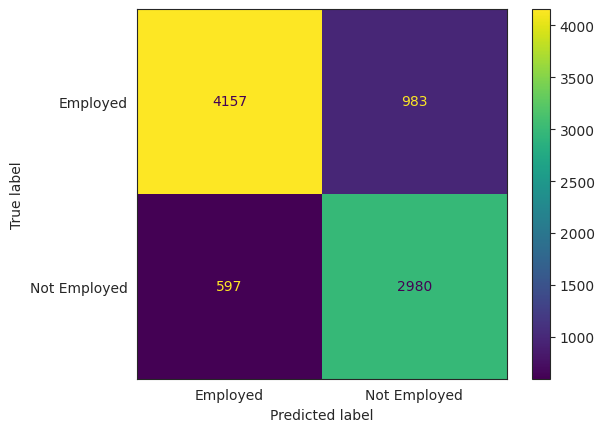

Tuning RandomForestClassifier...
Tuning for RandomForestClassifier is finished
####################  Folktables_la  ####################
Test model:  RandomForestClassifier
Test model parameters:
{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

              precision    recall  f1-score   support

           0      0.882     0.781     0.828      5140
           1      0.729     0.849     0.785      3577

    accuracy                          0.809      8717
   macro avg      0.806     0.815     0.806      8717
weighted avg      0.819     0.809     0.810      8717



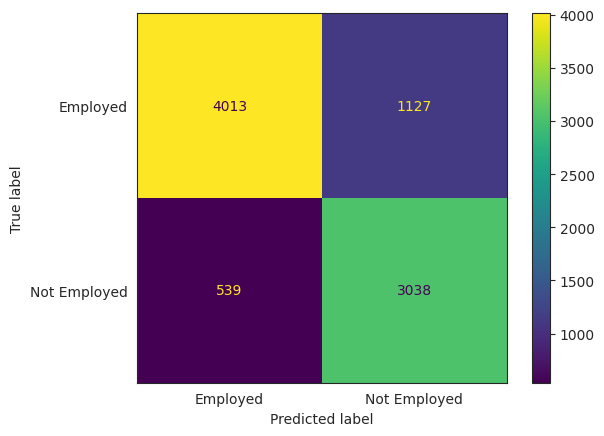

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,Folktables_la,XGBClassifier,0.815379,0.818745,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,Folktables_la,RandomForestClassifier,0.806458,0.808879,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."


In [34]:
ML_baseline_results_df = test_baseline_models(baseline_X_data, baseline_y_data, categorical_features, numerical_features,
                                              dataset_name=f"{dataset_name.capitalize()}_{state}")
ML_baseline_results_df

In [35]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: XGBClassifier
{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'binary:logistic'}


Model name: RandomForestClassifier
{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}


In [36]:
ML_baseline_results_df.to_csv(os.path.join('..', '..', 'results', f'ML_baseline_results_{extended_dataset_name}.csv'),
                              sep=",", columns=ML_baseline_results_df.columns, float_format="%.4f")